# K-nearest neighbors classification - An implementation

By Jaime Lopez  
Apr. 20, 2019 (Updated Apr. 27, 2019)

In this notebook an implementation of the K-nearest neighbor classification method is made. It uses as an example the Iris dataset. Next, this implementation is compared with the provided by scikit-learn library.

Nearest neighbor methods use those observations in the training sample closest in the input space to $x$ to predict $\hat{y}$.

$$\hat{y} = \frac{1}{k} \sum_{x_i \in N_k{x}} y_i$$

$N_k{k}$ is the neighborhood of $x$ defined by the $k$ closest points $x_i$ in the training sample.

## Setting environment

In this section, libraries are loaded.

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data exploration

In this section, the dataset Iris is explored.

In [5]:
data = pd.read_csv('datasets/iris/iris.csv')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sl       150 non-null float64
sw       150 non-null float64
pl       150 non-null float64
pw       150 non-null float64
class    150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


Column names correspond to:

- sl: sepal lenght
- sw: sepal width
- pl: petal lenght
- pw: petal width

In [9]:
data.shape

(150, 5)

In [10]:
data.head()

,sl,sw,pl,pw,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In next cells, attributes from Iris dataset are combined and displayed to know that relationship they have.

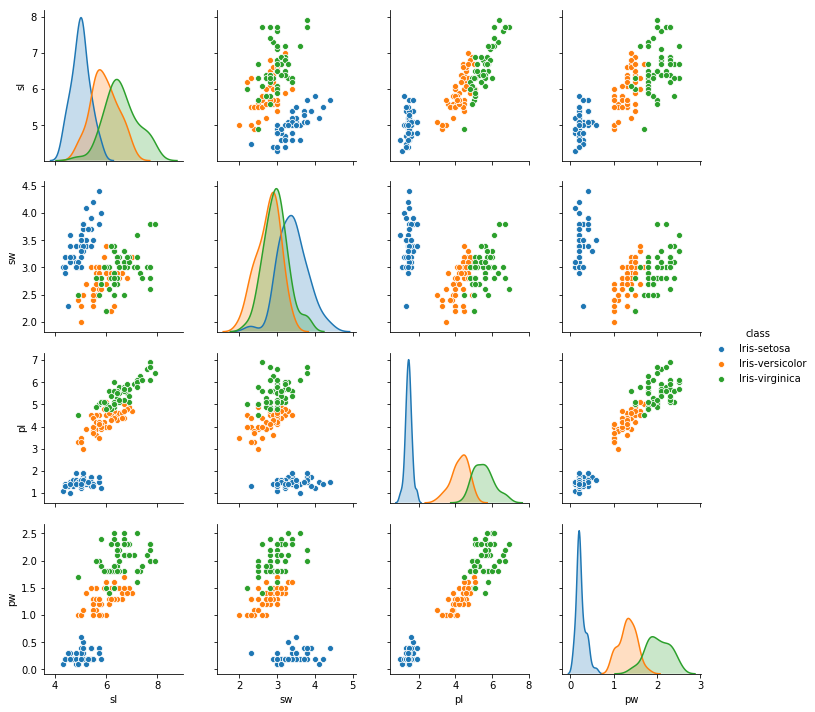

In [32]:
sns.pairplot(data, hue='class')

## Support tasks

Some basic functions are created to support following tasks.

In [33]:
def make_train_test_samples(data, level=0.8):
    """
    This function splits a dataframe in to sub-sets,
    one is called train data set. The other one
    is called test dataset. Level indicates proportions
    of observations that the train dataset will have.
    """
    train = data.sample(int(len(data) * level), random_state=10)
    test  = data.drop(train.index)
    return (train, test)

In [34]:
def euclidean_distance(x, y):
    """
    A function to calculate the Euclidean distante
    between two points.
    """
    return np.sqrt(((x - y) ** 2).sum())

In [35]:
def dist_matrix(data):
    """
    This function creates a matrix combining observations
    and calculating their distances. It is an intensive
    CPU demanding process. In future implementations
    a better approach have to be selected to speed the
    implementation.
    """
    l = len(data)
    ret = np.zeros(shape=(l, l))
    for i in range(l):
        for j in range(i + 1, l):
            x = data.iloc[i][features]
            y = data.iloc[j][features]
            ret[i, j] = euclidean_distance(x, y)
            ret[j, i] = ret[i, j]
    return ret

## KNN implementation

An own implementation is developed and will be tested.

In [36]:
train, test = make_train_test_samples(data, 0.8)
print('Train sample: %d elements' % len(train))
print('Test sample : %d elements' % len(test))

Train sample: 120 elements
Test sample : 30 elements


In [37]:
features = data.columns[:4]
label = data.columns[4]

In [38]:
test.head()

,sl,sw,pl,pw,class
0,5.1,3.5,1.4,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa
13,4.3,3.0,1.1,0.1,Iris-setosa
15,5.7,4.4,1.5,0.4,Iris-setosa


In [39]:
# The matrix of distances is created.
dm = dist_matrix(data)

In [40]:
def knn_nearest(test_index, test, train, dist_matrix, k):
    """
    This function returns the nearest
    observation in the train dataset
    for a given observation in the
    test dataset.
    """
    ret = np.zeros(k, dtype=int)
    dist = dist_matrix[test_index,].copy()
    dist[test_index] = np.inf
    counter = 0
    while True:
        j = (dist.argmin())
        dist[j] = np.inf
        if j in train.index:
            ret[counter] = j
            counter += 1
            if counter >= k:
                break
    return ret

In [41]:
# An example using the previous functions
knn_nearest(15, test, train, dm, k=5)

array([14,  5, 18, 32, 10])

In [42]:
def knn_classify(test_index, test, train, dist_matrix, k=1):
    """
    Based in the nearest neighbors,
    this functions assigns a label to
    the given observation from the test dataset.
    """
    items = knn_nearest(test_index, test, train, dist_matrix, k)
    dist = [dist_matrix[test_index, x] for x in items]
    labels = [train.loc[x][label] for x in items]
    ret = {}
    for i in range(len(items)):
        if labels[i] in ret.keys():
            ret[labels[i]] += 1
        else:
            ret[labels[i]] = 1
    return max(ret, key=ret.get)

In [43]:
# An example using the previous function
knn_classify(15, test, train, dm, k=5)

'Iris-setosa'

In [44]:
def knn(test, train, k=1):
    """
    Returns predictions for the
    test dataset.
    """
    y_hat = []
    for idx in test.index:
        y_hat.append(knn_classify(idx, test, train, dm, k))
    return y_hat

In [49]:
y_hat = knn(test, train, k=5)
print(y_hat)

['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica', 'Iris-virginica', 'Iris-virginica', 'Iris-virginica', 'Iris-virginica', 'Iris-virginica', 'Iris-virginica', 'Iris-virginica', 'Iris-virginica', 'Iris-virginica', 'Iris-virginica', 'Iris-virginica']


## Meassuring accurracy

In [50]:
def confussion_matrix(y, y_hat):
    """
    This function commpare the estimated
    values with the real values and
    build a confussion matrix.
    """
    aux = pd.DataFrame({'y': y, 'y_hat': y_hat})
    aux['comp'] = (aux.y == aux.y_hat).apply(lambda x: 'Positive' if x else 'Negative')
    return pd.crosstab(aux.y, aux.comp)

In [51]:
confussion_matrix(test[label], y_hat)

comp,Negative,Positive
y,,
Iris-setosa,0,9
Iris-versicolor,1,8
Iris-virginica,0,12


In [52]:
def accurracy(test, train, k=1):
    """
    This function caluclates the
    accurracy in predictions for
    a given k value.
    """
    y_hat = knn(test, train, k)
    cf = confussion_matrix(test[label], y_hat)
    accu = cf.Positive.sum() / cf.sum().sum()
    return accu

In [53]:
accurracy(test, train, k=5)

0.9666666666666667

In [54]:
r = range(1, 25)
results = [accurracy(test, train, k) for k in r]

Text(0, 0.5, 'accurracy')

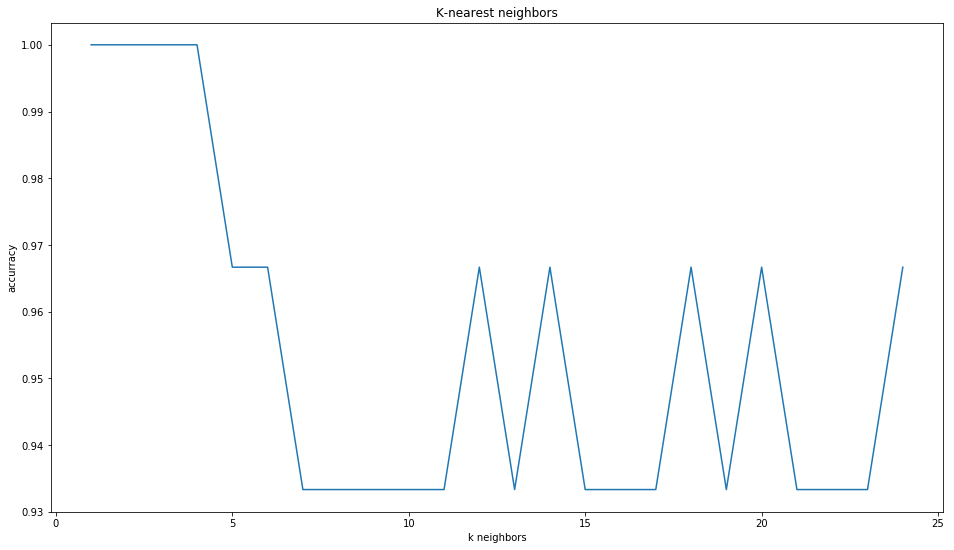

In [55]:
plt.figure(figsize=(16,9))
plt.plot(r, results)
plt.title('K-nearest neighbors')
plt.xlabel('k neighbors')
plt.ylabel('accurracy')

## Comparing with scikt-learn

In this secction, the KNN method implemented in the SKLear library is used. It ranks effectiveness over 0.9.

In [56]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [57]:
def sk_accurracy(k):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train[features], train[label])
    y_hat = knn.predict(test[features])
    cf = confussion_matrix(test[label], y_hat)
    accu = cf.Positive.sum() / cf.sum().sum()
    return accu

In [58]:
sk_results = [sk_accurracy(k) for k in r]

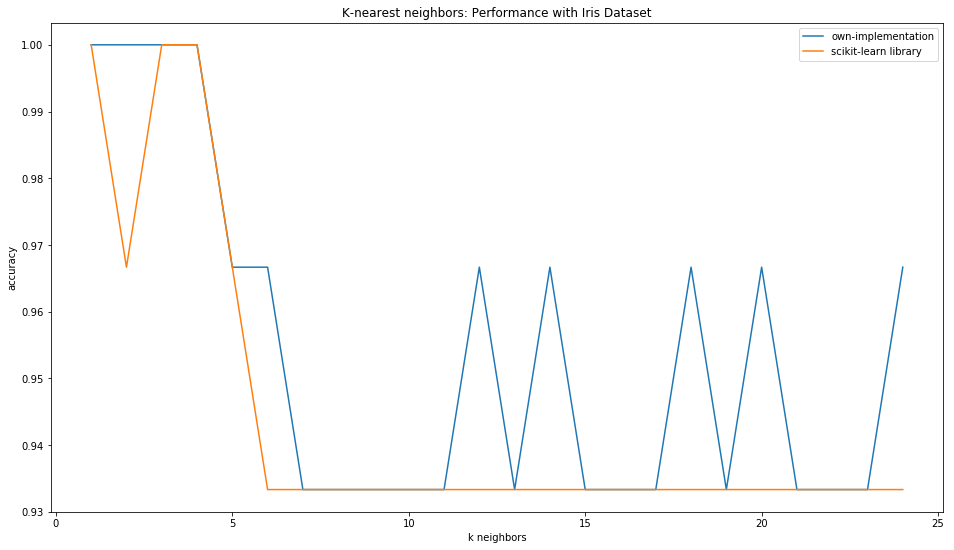

In [59]:
plt.figure(figsize=(16,9))
plt.plot(r, results)
plt.plot(r, sk_results)
plt.title('K-nearest neighbors: Performance with Iris Dataset')
plt.xlabel('k neighbors')
plt.ylabel('accuracy')
plt.legend(['own-implementation', 'scikit-learn library'], loc='upper right')

**References:**

- Hastie, T., Tibshirani, R., and Friedman, J. (2009). _The Elements of Statistical Learning_. Springer. pp. 14-16.
- Peterson, L. (2009). K-nearest neighbor. _Scholarpedia_, 4(2):1883. <doi:10.4249/scholarpedia.1883>